In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

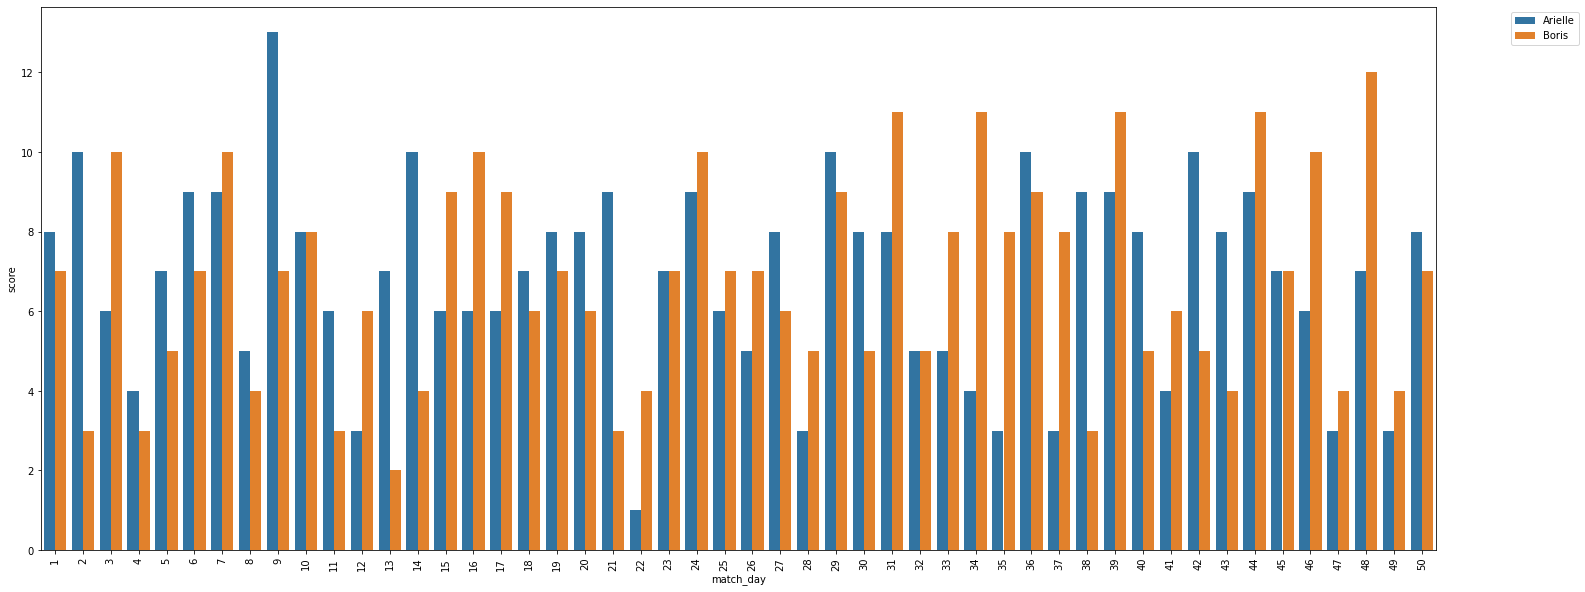

    match_day     name hand  score  attempts  successratio
0           1  Arielle    R      8        20          40.0
1           2  Arielle    R     10        20          50.0
2           3  Arielle    R      6        20          30.0
3           4  Arielle    L      4        20          20.0
4           5  Arielle    R      7        20          35.0
..        ...      ...  ...    ...       ...           ...
95         46    Boris    R     10        20          50.0
96         47    Boris    L      4        20          20.0
97         48    Boris    R     12        20          60.0
98         49    Boris    L      4        20          20.0
99         50    Boris    L      7        20          35.0

[100 rows x 6 columns]
             score           successratio           
               sum      mean        count       mean
name    hand                                        
Arielle L       72  4.800000           15  24.000000
        R      269  7.685714           35  38.428571
Bor

In [107]:
df = pd.read_csv('./data.csv')

plt.figure(figsize=(25, 10))
sns.barplot(x='match_day', y='score', data=df, hue='name')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

#creating success ratio metric to measure the success from the outcome
df['successratio'] = ((df['score']/df['attempts'])*100)
print(df)
#group by name and hand to see how the success is there
grouped_value = df.groupby(['name','hand']).agg({'score':['sum','mean'],'successratio':['count','mean']})
print(grouped_value)
#group by just name to see how the metric perform
grouped_value_2 = df.groupby(['name']).agg({'score':'sum','successratio':['count','mean']})
print(grouped_value_2)

In [116]:
#do transformations to build a dataset to determine the winner

#filter only arielle also select & rename few variables 
df_new_1 = df[(df.name == "Arielle")]
df_arielle =df_new_1.rename(columns = {'hand':'hand_arielle', 'score':'score_arielle','successratio':'successratio_arielle'}, inplace = False)
df_arielle = df_arielle.drop(['name'],axis=1)

#filter only boris data
df_new_2 = df[(df.name == "Boris")]
df_new_boris = df_new_2.rename(columns = {'hand':'hand_boris', 'score':'score_boris','successratio':'successratio_boris'}, inplace = False)
df_new_boris = df_new_boris.drop(['name','attempts'],axis=1)

#now join both the dataframe and make it to a single dataframe
df_new = pd.merge(df_arielle,df_new_boris, how='left',on='match_day')

#fucntions to select the winner
def selectwinner(row):
    if row['score_arielle'] < row['score_boris']:
        val = 'Boris_Winner'
    elif row['score_arielle'] > row['score_boris']:
        val = 'Arielle_Winner'
    else:
        val = 'Draw'
    return val

#function to select the winner's play hand
def winnerhand(row):
    if row['score_arielle'] < row['score_boris']:
        val = row['hand_boris']
    elif row['score_arielle'] > row['score_boris']:
        val = row['hand_arielle']
    else:
        val = 'Draw'
    return val

#function to select the winners score difference 
def selectscore(row):
    if row['score_arielle'] > row['score_boris']:
        val = row['score_arielle'] - row['score_boris']
    elif row['score_arielle'] < row['score_boris']:
        val = row['score_boris'] - row['score_arielle']
    else:
        val = 0
    return val

#split the dataframe to segments
def match_segment(row):
    if row['match_day'] >=1 and row['match_day']<=20:
        val = 'Segment1'
    elif row['match_day'] >=21 and row['match_day']<=35:
        val='Segment2'
    else:
        val = 'Segment3'
    return val

#create new columns using the above functions
df_new['winner'] = df_new.apply(selectwinner, axis=1)
df_new['winner_scorediff'] = df_new.apply(selectscore, axis=1)
df_new['match_segment'] = df_new.apply(match_segment, axis=1)
df_new['winnerhand'] = df_new.apply(winnerhand, axis=1)
print(df_new)



    match_day hand_arielle  score_arielle  attempts  successratio_arielle  \
0           1            R              8        20                  40.0   
1           2            R             10        20                  50.0   
2           3            R              6        20                  30.0   
3           4            L              4        20                  20.0   
4           5            R              7        20                  35.0   
5           6            R              9        20                  45.0   
6           7            R              9        20                  45.0   
7           8            L              5        20                  25.0   
8           9            R             13        20                  65.0   
9          10            R              8        20                  40.0   
10         11            L              6        20                  30.0   
11         12            L              3        20                  15.0   

                                                      sum  count      mean
match_segment winner         hand_boris hand_arielle                      
Segment1      Arielle_Winner L          L               5      3  1.666667
                                        R              31      8  3.875000
                             R          R               2      2  1.000000
              Boris_Winner   L          L               6      2  3.000000
                                        R               4      1  4.000000
                             R          L               3      1  3.000000
                                        R               5      2  2.500000
              Draw           L          R               0      1  0.000000
Segment2      Arielle_Winner L          L               3      1  3.000000
                                        R               8      2  4.000000
                             R          R               1      1  1.000000
              Boris_Winne

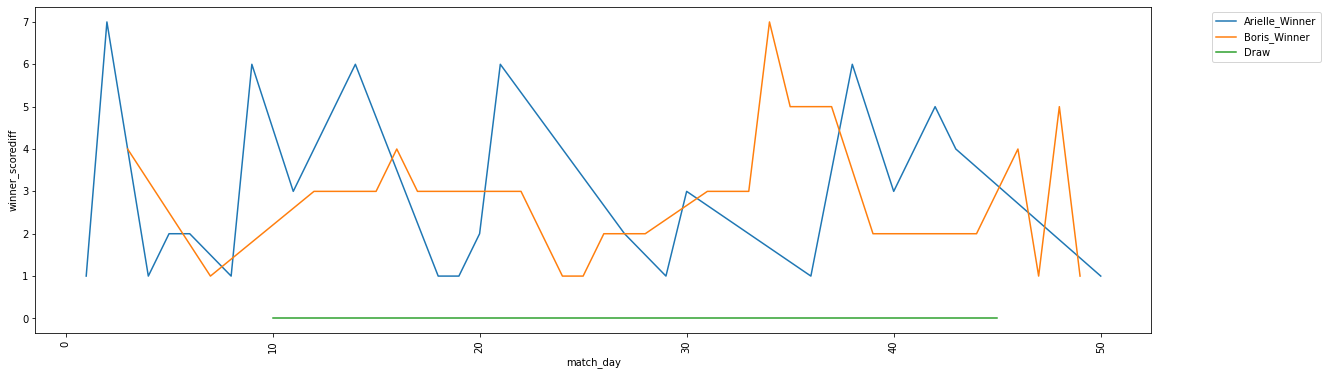

In [117]:
#summarise the data by different segments to understand the data
grouped_value = df_new.groupby(['match_segment','winner','hand_boris','hand_arielle']).winner_scorediff.agg(['sum','count','mean'])
print(grouped_value)

#group by winner and each user hand
grouped_value_1 = df_new.groupby(['winner','hand_boris','hand_arielle']).winner_scorediff.agg(['sum','count','mean'])
print(grouped_value_1)

#group by segment,winner and winner hand
grouped_value_2 = df_new.groupby(['match_segment','winner','winnerhand']).winner_scorediff.agg(['sum','count','mean'])
print(grouped_value_2)

#group by winner and winner hand
grouped_value_3 = df_new.groupby(['winner','winnerhand']).winner_scorediff.agg(['sum','count','mean'])
print(grouped_value_3)

#group by segment and winner
grouped_value_4 = df_new.groupby(['match_segment','winner']).winner_scorediff.agg(['sum','count','mean'])
print(grouped_value_4)

#group by winner alone
grouped_value_5 = df_new.groupby(['winner']).winner_scorediff.agg(['sum','count','mean'])
print(grouped_value_5)

#plot a line chart to see how the winner are prefroming daywise
plt.figure(figsize=(20, 6))
sns.lineplot(x='match_day', y='winner_scorediff', data=df_new, hue='winner')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()